In [11]:
import torch
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

in_features = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(in_features, 133)

In [13]:
# from workspace_utils import active_session
import os.path
from os import path

import torchvision.models as models
import torch.nn as nn

# # Defining the loaders for training, validation and testing
# loaders_scratch={
#     'train': torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True),
#     'valid': torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True),
#     'test': torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
# }

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

In [15]:
import cv2                
import matplotlib.pyplot as plt  

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [17]:
class_names = ['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog', 'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois', 'Belgian sheepdog', 'Belgian tervuren', 'Bernese mountain dog', 'Bichon frise', 'Black and tan coonhound', 'Black russian terrier', 'Bloodhound', 'Bluetick coonhound', 'Border collie', 'Border terrier', 'Borzoi', 'Boston terrier', 'Bouvier des flandres', 'Boxer', 'Boykin spaniel', 'Briard', 'Brittany', 'Brussels griffon', 'Bull terrier', 'Bulldog', 'Bullmastiff', 'Cairn terrier', 'Canaan dog', 'Cane corso', 'Cardigan welsh corgi', 'Cavalier king charles spaniel', 'Chesapeake bay retriever', 'Chihuahua', 'Chinese crested', 'Chinese shar-pei', 'Chow chow', 'Clumber spaniel', 'Cocker spaniel', 'Collie', 'Curly-coated retriever', 'Dachshund', 'Dalmatian', 'Dandie dinmont terrier', 'Doberman pinscher', 'Dogue de bordeaux', 'English cocker spaniel', 'English setter', 'English springer spaniel', 'English toy spaniel', 'Entlebucher mountain dog', 'Field spaniel', 'Finnish spitz', 'Flat-coated retriever', 'French bulldog', 'German pinscher', 'German shepherd dog', 'German shorthaired pointer', 'German wirehaired pointer', 'Giant schnauzer', 'Glen of imaal terrier', 'Golden retriever', 'Gordon setter', 'Great dane', 'Great pyrenees', 'Greater swiss mountain dog', 'Greyhound', 'Havanese', 'Ibizan hound', 'Icelandic sheepdog', 'Irish red and white setter', 'Irish setter', 'Irish terrier', 'Irish water spaniel', 'Irish wolfhound', 'Italian greyhound', 'Japanese chin', 'Keeshond', 'Kerry blue terrier', 'Komondor', 'Kuvasz', 'Labrador retriever', 'Lakeland terrier', 'Leonberger', 'Lhasa apso', 'Lowchen', 'Maltese', 'Manchester terrier', 'Mastiff', 'Miniature schnauzer', 'Neapolitan mastiff', 'Newfoundland', 'Norfolk terrier', 'Norwegian buhund', 'Norwegian elkhound', 'Norwegian lundehund', 'Norwich terrier', 'Nova scotia duck tolling retriever', 'Old english sheepdog', 'Otterhound', 'Papillon', 'Parson russell terrier', 'Pekingese', 'Pembroke welsh corgi', 'Petit basset griffon vendeen', 'Pharaoh hound', 'Plott', 'Pointer', 'Pomeranian', 'Poodle', 'Portuguese water dog', 'Saint bernard', 'Silky terrier', 'Smooth fox terrier', 'Tibetan mastiff', 'Welsh springer spaniel', 'Wirehaired pointing griffon', 'Xoloitzcuintli', 'Yorkshire terrier']

In [19]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # All pre-trained models expect input images normalized in the same way, 
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), 
    # where H and W are expected to be at least 224. 
    # The images have to be loaded in to a range of [0, 1] 
    # and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224), 
                                    transforms.ToTensor(), 
                                    normalize])
    
    # Open image and apply transformation
    image = Image.open(img_path)
    image = transform(image)
    image.unsqueeze_(0)
    
    # # move image to GPU if CUDA is available
    # if use_cuda:
    #     image = image.cuda()

    # Predict using model_transfer
    image_var = torch.autograd.Variable(image)
    # print(image_var)
    prediction = model_transfer(image_var)
    value, index = torch.max(prediction, 1)

    return class_names[index[0].item()]

In [21]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    
    if dog_detector(img_path):
        plt.imshow(img)
        plt.show()
        print('Hello, dog!')
        print('Your predicted breed is ...', predict_breed_transfer(img_path))
    elif face_detector(img_path):
        plt.imshow(img)
        plt.show()
        print('Hello, human!')
        print('Your look like a ...', predict_breed_transfer(img_path))
    else:
        plt.imshow(img)
        plt.show()
        print('Classification error, no dog or human found!')
                

In [23]:
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models

# # define VGG16 model
VGG16 = models.vgg16(pretrained=True)


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # All pre-trained models expect input images normalized in the same way, 
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), 
    # where H and W are expected to be at least 224. 
    # The images have to be loaded in to a range of [0, 1] 
    # and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224), 
                                    transforms.ToTensor(), 
                                    normalize])
    
    # Open image and apply transformation
    image = Image.open(img_path)
    image = transform(image)
    image.unsqueeze_(0)
    
    # # move image to GPU if CUDA is available
    # if use_cuda:
    #     image = image.cuda()

    # Predict using VGG16
    image_var = torch.autograd.Variable(image)
    prediction = VGG16(image_var)
    value, index = torch.max(prediction, 1)

    return index[0].item() # predicted class index

In [25]:
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction_index = VGG16_predict(img_path)
    return (151 <= prediction_index <= 268) # true/false

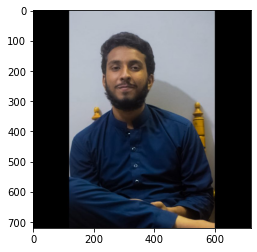

Hello, human!
Your look like a ... Dachshund


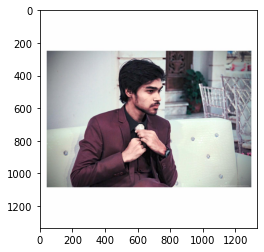

Hello, human!
Your look like a ... Maltese


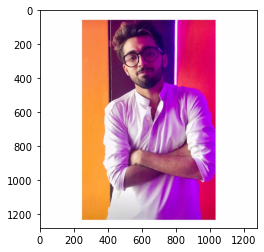

Classification error, no dog or human found!


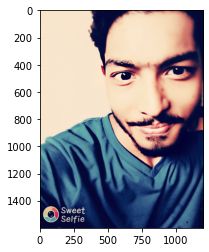

Hello, human!
Your look like a ... Chinese crested


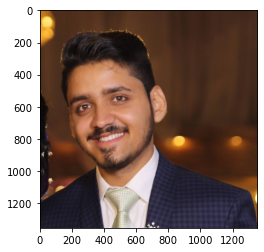

Hello, human!
Your look like a ... Cardigan welsh corgi


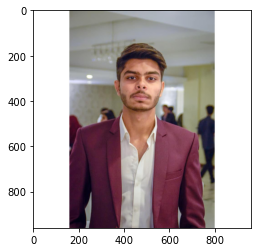

Hello, human!
Your look like a ... Irish wolfhound


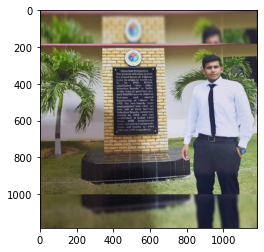

Hello, human!
Your look like a ... Neapolitan mastiff


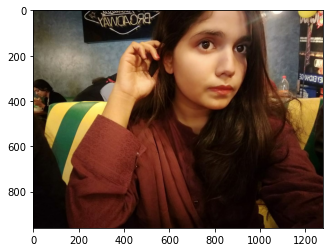

Hello, human!
Your look like a ... Yorkshire terrier


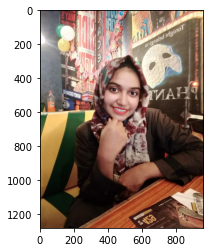

Hello, human!
Your look like a ... Dalmatian


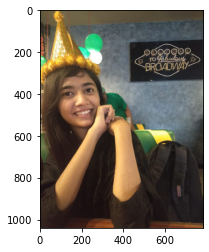

Hello, human!
Your look like a ... Afghan hound


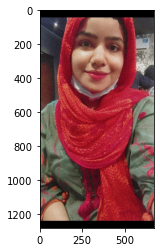

Hello, human!
Your look like a ... Black and tan coonhound


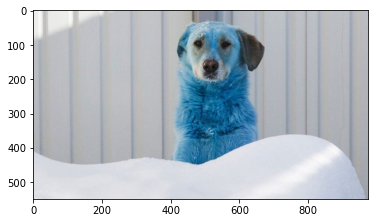

Hello, dog!
Your predicted breed is ... English setter


In [27]:
import os
from PIL import Image 
## suggested code, below
# for file in np.hstack((human_files[:3], dog_files[:3])):
#     run_app(file)

for filename in os.listdir('test_images/'):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        run_app('./test_images/' + filename)